In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import gudhi


import iblofunmatch.inter as ibfm

_tol = 1e-10

output_dir = "output" # Name of directory to communicate with C++ program
data_dir = os.path.join("datasets")
plots_dir = os.path.join("plots")
os.makedirs(output_dir, exist_ok=True)
os.makedirs(data_dir, exist_ok=True)
os.makedirs(plots_dir, exist_ok=True)

EXECUTABLE_PATH: /home/atorras/Documents/IBloFunMatch/build/IBloFunMatch


# Example 1
We write an example using a circle point cloud

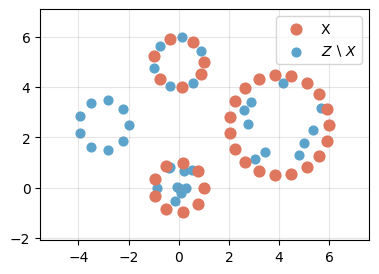

In [2]:
import random

RandGen = np.random.default_rng(5)
C0 = ibfm.circle(1,10)
C1 = ibfm.circle(2,20) + [4,2.5]
C2 = ibfm.circle(1,14) + [0,5]
C3 = ibfm.circle(1,10) + [-3,2.5]
C4 = ibfm.sampled_circle(1.2,1.8,10, RandGen) + [4,2.5]
B0 = ibfm.sampled_circle(0,1,10, RandGen)
Z = np.vstack((C0, C1, C2, C3,C4, B0))
indices_subset = list(range(0,C0.shape[0]+C1.shape[0])) + list(range(C0.shape[0]+C1.shape[0], C0.shape[0]+C1.shape[0]+C2.shape[0],2))
indices_subset = np.sort(indices_subset)
fig, ax = plt.subplots(ncols=1, figsize=(5,3))
ibfm.plot_Vietoris_Rips_subset(Z, indices_subset, 0, ax)
plt.legend()
plt.savefig(os.path.join(plots_dir, "points_1.png"))

In [3]:
matching_data = ibfm.get_IBloFunMatch_subset(None, Z, indices_subset, output_dir, num_it=4, max_rad=-1, points=True)

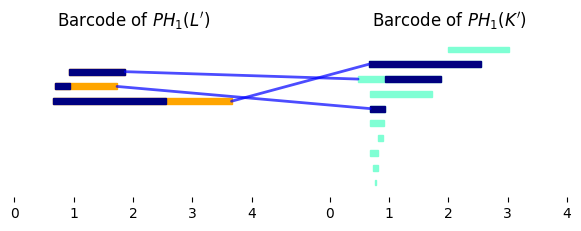

In [4]:
fig, ax = plt.subplots(1,2, figsize=(7,3.5))
ibfm.plot_matching(matching_data, ax, fig)
ylim = ax[1].get_ylim()
diff = 0.5*(ylim[1]-ylim[0])
ax[0].set_ylim((ylim[0]-diff, ylim[1]-diff))
ax[0].set_title("Barcode of $PH_1(L')$", fontsize=12)
ax[1].set_title("Barcode of $PH_1(K')$", fontsize=12)
plt.tight_layout(pad=5)
plt.savefig(os.path.join(plots_dir, "matching_1.png"))

Print coefficients of induced matrix in dimension $1$

In [5]:
matching_data["pm_matrix_1"]

[[np.int64(8)], [np.int64(2), np.int64(5)], [np.int64(7)]]

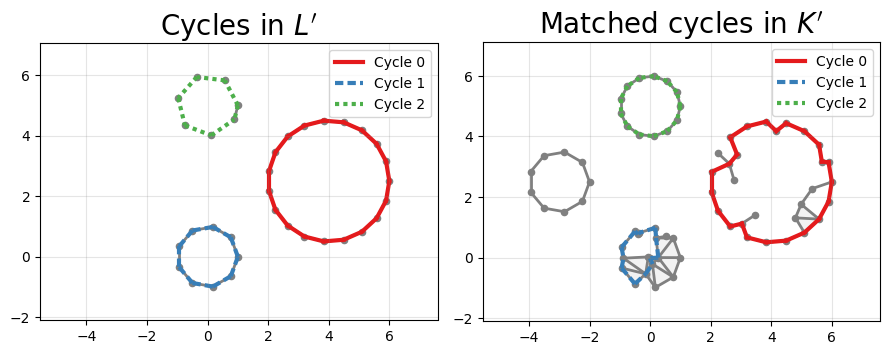

In [6]:
fig, ax = plt.subplots(1,2, figsize=(9,4))
filt_val = 0.9
ibfm.plot_Vietoris_Rips(Z[indices_subset], filt_val, ax[0], labels=False, fontsize=15, color="gray")
ibfm.plot_Vietoris_Rips(Z, filt_val, ax[1], labels=False, fontsize=15, color="gray")
ax[0].set_xlim(ax[1].get_xlim())
colormap = mpl.colormaps["Set1"]
# Depict three cycles generating domain and their respective images
dashes_list = [None, [2,1], [1,1]]
for i in range(3):
    ibfm.plot_cycle(Z, matching_data["S_reps_1"][i], ax[0], color=colormap(i/8), linewidth=3, label=f"Cycle {i}", dashes=dashes_list[i])
# Depict matched circles
induced_matching_1 = matching_data["induced_matching_1"]
for i in range(3):
    ibfm.plot_cycle(Z, matching_data["X_reps_1"][induced_matching_1[i]], ax[1], color=colormap(i/8), linewidth=3, label=f"Cycle {i}", dashes=dashes_list[i])

# Set titles
ax[0].set_title("Cycles in $L'$", fontsize=20)
ax[1].set_title("Matched cycles in $K'$", fontsize=20)

# Plot legends 
for i in range(2):
    handles, labels = ax[i].get_legend_handles_labels()
    unique = dict(zip(labels, handles))  # Keeps last occurrence; preserves order in Python 3.7+
    ax[i].legend(unique.values(), unique.keys())

# Save figure
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "cycle_reps_matching_1.png"))